# Final Project

## Framing

**Introduction**: The dataset I'm working wiht are conference proceedings in cognitive and learning sciences from 1995-2015. I'm looking forward to seeing what practitioners and researchers were thinking about and working on and how current events shaped what people were interested in researching, especially as it relates to educational technology and psychology. 

**Research question(s)**: What trends persist and change in the learning sciences over the past 20 years? Are there decades or 5-year periods where more trends change than others? Are some technology-focused, especially as we move into the 2010s? 

**Hypotheses**:
    * Describe 2-3 hypotheses that you're planning to test with your dataset
    1. As we get later into the conference proceedings (2010-2015), there will be a greater focus on machine learning and artificial intelligence and, conversely, social emotional learning, as well, in comparison to 1995-2000. 
    2. Current events will, across the two decades, have at least indirect impacts on how educators and researchers examine the learning sciences, as they look for techniques outside of solely traditional pedagogy to support students. 
    * Each hypoteses should be based on academic research (cite a paper) and/or background knowledge that you have about the dataset if you've collected it yourself (e.g., if you've conducted interviews)
    * Each hypotheses should be formulated as an affirmation (and not a question)
    * You can also describe alternative hypotheses, if you think that your results could go either way (but again, have a rationale as for why)

**Results**:
    * how are you planning to test each hypothesis? What models are you thinking of using?
For the first hypothesis, I will use a co-word analysis. This is a means of clustering that uses the keywords of a paper to see if they're present in other papers. If they're present in other papers, that will demonstrate that there's not only a connection between those two papers, but also a trend within that time period (one year) regarding that topic (e.g. Machine learning in education, social emotional learning, peer to peer learning, etc.). This will also provide a cloud of words (a network) demonstrating how the items are connected. 
    * what are the best results you can hope for? Is that interesting / relevant for other researchers?
The best results would demonstrate strong connections between papers within the same 5 year period or at least within the same conference, demonstrating a unity across the field as to what's important. Since this is the first time this dataset has been examined, I hope that these methods will be good practice for me and interesting for other interested in doing corpus-related analysis, like co-word analysis or social network analysis. 
    * what are implications of your potential findings for practioners?

**Threads**
    * Describe issues that might arise during the analyses above
    * Come up with backup plans in case you run into theses issues

## Data Exploration

Describe your raw data below; provide definition / explanations for the measures you're using

## Data Cleaning

In [483]:
import glob
files = glob.glob("/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/*.txt")
print(files)

['/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1999.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1998.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2015.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2014.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2000.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2002.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2013.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2007.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2012.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts

In [484]:
year_abstracts = {}

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        content_of_file = f.read()
        # get the year of these abstracts
        year = filename.replace('.txt','').split('abstracts')[-1]
        # get a list of abstracts using split
        list_abstracts = content_of_file.split('\n\n')
        # save the data to your dictionary
        year_abstracts[year] = list_abstracts


In [485]:
for year, list_of_abstracts in year_abstracts.items(): 
    for i, abstract in enumerate(list_of_abstracts):
        list_of_abstracts[i] = list_of_abstracts[i].lower()
print(list_of_abstracts[0])

 this paper reports the synthesis of six case studies of students’ engagement in inquiry-based learning activities in an undergraduate geology course. details of how students engaged in the scientific inquiry practices of formulating explanations from evidence, and communicating and justifying  proposed  explanations  are  presented.  data  for  this  study  included  classroom observations  and  archival  data  (i.e.,  student  work  samples)  collected  during  a  semester-long investigation.  the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success, however, it was not without its challenges.  a detailed discussion of the ways in which students were successful, and where they had challenges engaging in these inquiry  practices  is  presented,  with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry-ba

In [486]:
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,abstract in enumerate(list_of_abstracts): 
    for punc in punctuation: 
        abstract = abstract.replace(punc, ' ')
    list_of_abstracts[i] = abstract
print(list_of_abstracts[0])

 this paper reports the synthesis of six case studies of students  engagement in inquiry based learning activities in an undergraduate geology course  details of how students engaged in the scientific inquiry practices of formulating explanations from evidence  and communicating and justifying  proposed  explanations  are  presented   data  for  this  study  included  classroom observations  and  archival  data   i e    student  work  samples   collected  during  a  semester long investigation   the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success  however  it was not without its challenges   a detailed discussion of the ways in which students were successful  and where they had challenges engaging in these inquiry  practices  is  presented   with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry ba

In [487]:
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']

for year in year_abstracts:
    for i, abstract in enumerate(year_abstracts[year]):
        for punc in punctuation:
            abstract = abstract.replace(punc, ' ')
        year_abstracts[year][i] = abstract
print(year_abstracts[year])

[' this paper reports the synthesis of six case studies of students  engagement in inquiry based learning activities in an undergraduate geology course  details of how students engaged in the scientific inquiry practices of formulating explanations from evidence  and communicating and justifying  proposed  explanations  are  presented   data  for  this  study  included  classroom observations  and  archival  data   i e    student  work  samples   collected  during  a  semester long investigation   the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success  however  it was not without its challenges   a detailed discussion of the ways in which students were successful  and where they had challenges engaging in these inquiry  practices  is  presented   with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry 

In [488]:
#import pandas as pd
#from collections import defaultdict 

#word_freq = defaultdict(int)


#for abstract in list_of_abstracts:
 #   for word in abstract.split():
  #      word_freq[word] += 1

In [489]:
stop_words =['in', 'this', 'in this paper', 'students', 'as', 'from', 'knowledge',
            'teachers', 'were', 'these', 'school', 'how', 'two', 'student', 'which', 'was',
            'about', 'paper', 'more', 'development', 'between', 'used', 'our', 'results',
            'using', 'or', 'they', 'such', 'both', 'at', 'also', 'and', 'two', 'a', 'an', 'it',
            'is', 'the', 'in', 'to', 'that', 'learning', 'this', 'on', 'we', 'with', 'their', 
            'study', 'science', 'research', 'are', 'have', 'knowledge', 'teachers', 'based', 'by', 'were', 
            'these', 'of', 'the', 'for', 'school', 'how', 'two', 's', 'student', 'can', 'have', 'use', 
            'understanding', 'more', 'between', 'model', 'our', 'results', 'using','problem', 'not',
            'one', 'or', 'been', 'through', 'I', 'i', 'what', 'there', 'had', 'but', 'uses', 'abstract',
            'abstract:']

for i,abstract in enumerate(list_of_abstracts):
    for stop_word in stop_words:
        abstract = abstract.replace(' ' + stop_word + ' ', ' ')
    list_of_abstracts[i] = abstract
print(list_of_abstracts)

[' reports synthesis six case studies  engagement inquiry activities undergraduate geology course  details engaged scientific inquiry practices formulating explanations evidence  communicating justifying  proposed  explanations   presented   data     included  classroom observations   archival  data   e     work  samples   collected  during   semester long investigation     suggest     able   appropriate   inquiry  practices varying degrees success  however  without its challenges   detailed discussion ways successful  where challenges engaging inquiry  practices   presented     goal   helping  guide  practitioners   researchers  creating environments take full advantage pedagogical strategy inquiry  ', ' collins ferguson  1993  introduced idea epistemic games forms interpret repeatable patterns expert behavior sciences   framework has  extended   educational  researchers   understand   activity   classrooms   tuminaro   redish   2005     computer  games   shaffer   2005   informal   e

In [490]:
stop_words =['in', 'this', 'in this paper', 'students', 'as', 'from', 'knowledge',
            'teachers', 'were', 'these', 'school', 'how', 'two', 'student', 'which', 'was',
            'about', 'paper', 'more', 'development', 'between', 'used', 'our', 'results',
            'using', 'or', 'they', 'such', 'both', 'at', 'also', 'and', 'two', 'a', 'an', 'it',
            'is', 'the', 'in', 'to', 'that', 'learning', 'this', 'on', 'we', 'with', 'their', 
            'study', 'science', 'research', 'are', 'have', 'knowledge', 'teachers', 'based', 'by', 'were', 
            'these', 'of', 'the', 'for', 'school', 'how', 'two', 's', 'student', 'can', 'have', 'use', 
            'understanding', 'more', 'between', 'model', 'our', 'results', 'using','problem', 'not',
            'one', 'or', 'been', 'through', 'I', 'i', 'what', 'there', 'had', 'but', 'uses', 'has', 
            'will', 'be', 'abstract', 'abstract:']
for year in year_abstracts:
    for i, abstract in enumerate(year_abstracts[year]):
        for stop_word in stop_words:
            abstract = abstract.replace(' ' + stop_word + ' ', ' ')
        year_abstracts[year][i] = abstract
print(year_abstracts[year])

[' reports synthesis six case studies  engagement inquiry activities undergraduate geology course  details engaged scientific inquiry practices formulating explanations evidence  communicating justifying  proposed  explanations   presented   data     included  classroom observations   archival  data   e     work  samples   collected  during   semester long investigation     suggest     able   appropriate   inquiry  practices varying degrees success  however  without its challenges   detailed discussion ways successful  where challenges engaging inquiry  practices   presented     goal   helping  guide  practitioners   researchers  creating environments take full advantage pedagogical strategy inquiry  ', ' collins ferguson  1993  introduced idea epistemic games forms interpret repeatable patterns expert behavior sciences   framework  extended   educational  researchers   understand   activity   classrooms   tuminaro   redish   2005     computer  games   shaffer   2005   informal   educa

In [492]:
from collections import defaultdict
import pandas as pd
wordfreqs = {}




for year in range(1995, 2016):
    if year == 2001 or year == 2003 or year == 2006:
        continue
        
    wordfreqs[year] = defaultdict(int)
    
    for abstract in year_abstracts[str(year)]:
        df = pd.DataFrame()
        for word in abstract.split():
            wordfreqs[year][word] += 1
            
wordfreqs

{1995: defaultdict(int,
             {'reports': 10,
              'synthesis': 4,
              'six': 15,
              'case': 29,
              'studies': 42,
              'engagement': 8,
              'inquiry': 55,
              'activities': 37,
              'undergraduate': 8,
              'geology': 1,
              'course': 25,
              'details': 3,
              'engaged': 16,
              'scientific': 43,
              'practices': 52,
              'formulating': 1,
              'explanations': 21,
              'evidence': 25,
              'communicating': 1,
              'justifying': 3,
              'proposed': 3,
              'presented': 15,
              'data': 50,
              'included': 8,
              'classroom': 44,
              'observations': 8,
              'archival': 1,
              'e': 28,
              'work': 26,
              'samples': 1,
              'collected': 9,
              'during': 29,
              'semester': 1,
  

In [493]:
abstract_list = list(year_abstracts[year])
def get_vocabulary(abstract_list):
    voc = []
    for abstract in abstract_list:
        for word in abstract.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# # # Then print the length of your vocabulary 
vocabulary = get_vocabulary(abstract_list)
print(len(vocabulary))

KeyError: 2015

In [494]:
df = pd.DataFrame.from_dict(wordfreqs, orient='index')

In [495]:
freq_word=[]

for word in df.columns:
    freq_word.append(df[word].sum())
  
a = sorted(freq_word)
#a is a list with the top 25 words
a = a[-25:]
#b tells us that column # whatever is in the top 25 words
b=[]

#creates a list b that has the words n their freqs

for i,value in enumerate(freq_word):
    for j in range(0,25):
        if value == a[j]:
            b.append(i)
            
#gives us a df with rows as years and how frequently the top 25 words show up in that year
df_new = pd.DataFrame()
for i in set(b):
    df1 = df[df.columns[i]]
    df_new = pd.concat([df_new, df1], axis=1, sort=False)
#year and frequencies of each of the top words 
df_new

,support,inquiry,activities,practices,new,data,classroom,work,environment,teacher,...,social,computer,online,cid,design,collaboration,community,learners,technology,different
1995,45,55,37,52,41,50,44,26,46,43,...,44,26,27.0,2.0,105,19,33,46,47,34
1996,16,2,18,3,6,4,14,11,15,8,...,3,18,1.0,NaN,28,3,8,3,5,10
1997,22,11,10,5,6,4,12,10,18,8,...,1,19,NaN,NaN,11,23,5,6,10,7
1998,21,10,16,5,10,2,27,20,26,9,...,18,19,3.0,NaN,64,9,10,15,18,9
1999,39,10,12,4,21,18,23,13,22,10,...,21,36,10.0,10.0,52,36,27,24,25,16
2000,74,44,19,7,44,52,22,47,58,27,...,22,24,51.0,NaN,154,22,19,17,49,52
2002,97,26,52,18,52,23,49,68,69,35,...,38,73,49.0,NaN,75,85,47,39,55,40
2004,16,15,13,13,18,14,16,13,20,24,...,12,11,10.0,NaN,30,4,18,16,18,12
2005,26,11,19,2,24,22,11,14,24,13,...,34,24,51.0,2.0,74,38,27,35,20,14
2007,56,16,53,31,43,26,29,23,35,27,...,49,47,83.0,NaN,65,65,39,42,48,30


In [496]:
df_new = df_new.fillna(value = 0)
df_new

,support,inquiry,activities,practices,new,data,classroom,work,environment,teacher,...,social,computer,online,cid,design,collaboration,community,learners,technology,different
1995,45,55,37,52,41,50,44,26,46,43,...,44,26,27.0,2.0,105,19,33,46,47,34
1996,16,2,18,3,6,4,14,11,15,8,...,3,18,1.0,0.0,28,3,8,3,5,10
1997,22,11,10,5,6,4,12,10,18,8,...,1,19,0.0,0.0,11,23,5,6,10,7
1998,21,10,16,5,10,2,27,20,26,9,...,18,19,3.0,0.0,64,9,10,15,18,9
1999,39,10,12,4,21,18,23,13,22,10,...,21,36,10.0,10.0,52,36,27,24,25,16
2000,74,44,19,7,44,52,22,47,58,27,...,22,24,51.0,0.0,154,22,19,17,49,52
2002,97,26,52,18,52,23,49,68,69,35,...,38,73,49.0,0.0,75,85,47,39,55,40
2004,16,15,13,13,18,14,16,13,20,24,...,12,11,10.0,0.0,30,4,18,16,18,12
2005,26,11,19,2,24,22,11,14,24,13,...,34,24,51.0,2.0,74,38,27,35,20,14
2007,56,16,53,31,43,26,29,23,35,27,...,49,47,83.0,0.0,65,65,39,42,48,30


In [559]:
sums = pd.DataFrame(df_new.sum(axis = 0))
sums.sort_values(by = [0], ascending = False)

,0
design,1744.0
collaborative,1459.0
cid,1200.0
support,941.0
group,889.0
analysis,881.0
online,747.0
data,719.0
collaboration,715.0
work,693.0


In [390]:
def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0
df_log = df_new.applymap(one_plus_log)

In [391]:
print("before one + log: ", df_new.loc[1995,'support'])
print("after one + log: ", 1 + math.log(df_new.loc[1995,'support']))
print("Value in the dataframe: ", df_log.loc[1995,'support'])

before one + log:  45
after one + log:  4.80666248977032
Value in the dataframe:  4.80666248977032


In [392]:
v_sum = np.sum(df_log.values, axis=0)

In [393]:
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

v_avg = length_norm(v_sum)

In [394]:
matrix = df_log.values

for row in range(df_log.shape[0]):

    # this is one vector (row
    v_i = matrix[row,:]

    # we subtract its component along v_average
    scalar = np.dot(v_i,v_avg)
    sub = v_avg * scalar

    # we replace the row by the deviation vector
    matrix[row,:] = length_norm(v_i - sub)

In [395]:
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_new.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

In [396]:
df_transformed = transform_deviation_vectors(df_log)
df_transformed

,support,inquiry,activities,practices,new,data,classroom,work,environment,teacher,...,social,computer,online,education,cid,design,collaboration,learners,technology,different
1995,-0.131556,0.239574,-0.056531,0.349860,0.021666,0.156617,0.011542,-0.179354,0.021821,0.086197,...,0.125396,-0.171699,0.076355,0.213114,-0.102624,-0.051755,-0.213149,0.086688,0.070742,-0.031225
1996,0.152914,-0.200614,0.228977,-0.058101,0.002238,-0.051580,0.167350,0.131203,0.185761,0.080337,...,-0.097825,0.231618,-0.255306,0.221311,-0.420826,0.184008,-0.102217,-0.142740,-0.033030,0.127200
1997,0.163784,0.110106,0.041916,-0.021599,-0.061602,-0.137377,0.083453,0.048353,0.171336,0.020323,...,-0.446265,0.199039,-0.626034,-0.128469,-0.256185,-0.088820,0.266302,-0.055526,0.050317,-0.018985
1998,0.083752,0.014975,0.085929,-0.116935,-0.030501,-0.464826,0.234456,0.156499,0.217093,-0.036894,...,0.158102,0.151750,-0.289171,0.097184,-0.319102,0.266695,-0.033086,0.091255,0.127901,-0.050350
1999,0.075196,-0.184703,-0.263353,-0.413566,0.003505,0.034594,-0.019564,-0.201758,-0.029789,-0.254266,...,0.140580,0.180169,0.067098,-0.051158,0.236523,-0.051648,0.343633,0.079795,0.085624,-0.075256
2000,0.188655,0.200526,-0.204228,-0.435942,0.142017,0.191667,-0.130172,0.154978,0.226106,-0.007162,...,-0.169186,-0.062250,0.164796,0.092647,-0.144876,0.259299,-0.148484,-0.228698,0.152250,0.215623
2002,0.173641,-0.212617,0.059326,-0.283937,0.071885,-0.392935,0.057730,0.191573,0.187583,-0.068211,...,-0.177869,0.311218,-0.093487,0.069158,0.000046,-0.258637,0.270625,-0.071534,0.045841,-0.056968
2004,0.003301,0.120026,0.023731,0.140486,0.127778,0.071800,0.083690,0.030185,0.137261,0.230328,...,0.031417,-0.003519,0.027470,-0.065357,-0.274335,0.049917,-0.267042,0.102090,0.119131,0.024477
2005,-0.079382,-0.172083,-0.071070,-0.608847,0.012280,-0.011539,-0.226177,-0.157754,-0.009121,-0.139651,...,0.111783,0.028452,0.261276,-0.007776,0.282267,0.072549,0.155646,0.130886,-0.059328,-0.140044
2006,-0.131556,0.239574,-0.056531,0.349860,0.021666,0.156617,0.011542,-0.179354,0.021821,0.086197,...,0.125396,-0.171699,0.076355,0.213114,-0.102624,-0.051755,-0.213149,0.086688,0.070742,-0.031225


In [232]:
# dictionary of dictionary that has frequency 
word_dfs = {}
word_dfs

{}

In [305]:
for year in range(1995, 2016):
    if year == 2001 or year == 2003:
        continue
    word_dfs[year] = pd.DataFrame().from_dict(wordfreqs[year], orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})

print(word_dfs)


{1995:                            abs_freq
design                          105
group                            56
inquiry                          55
education                        55
practices                        52
data                             50
analysis                         49
technology                       47
learners                         46
environment                      46
conceptual                       46
support                          45
curriculum                       44
self                             44
classroom                        44
process                          44
social                           44
scientific                       43
collaborative                    43
teacher                          43
studies                          42
questions                        42
new                              41
project                          41
solving                          40
however                          40
framework            

In [44]:
! pip install wordcloud

    100% |████████████████████████████████| 163kB 6.9MB/s ta 0:00:01


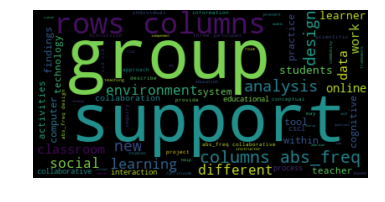

In [50]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

text = str(word_dfs)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [302]:
abstract_list = list(year_abstracts[year])
def get_vocabulary(abstract_list):
    voc = []
    for abstract in abstract_list:
        for word in abstract.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# # # Then print the length of your vocabulary 
vocabulary = get_vocabulary(abstract_list)
print(len(vocabulary))

KeyError: 2015

In [126]:
def flatten_and_overlap(list_of_documents, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_abstracts = []
    
    # flatten everything into one string
    flat = ""
    for abstract in list_of_abstracts:
        flat += abstract
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_abstracts.append(flat[low:high])
        high += overlap
    return new_list_of_abstracts

chunks = flatten_and_overlap(list_of_abstracts)

In [127]:
for chunk in chunks: 
    assert(len(chunk) == 100)
    
print(len(chunks))

616


In [138]:
def abstracts_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word1 in chunk:
            if word2 in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = abstracts_by_words_df(chunks, vocabulary)
print(df)

NameError: name 'word2' is not defined

In [35]:
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = docs_by_words_df(abstract, vocabulary)

In [497]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to df
    model.fit(df_log)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

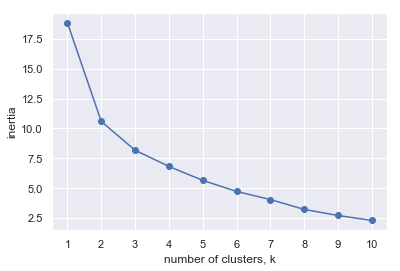

In [498]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

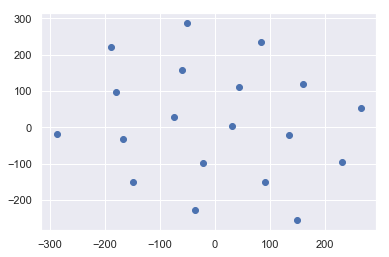

In [499]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_log)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

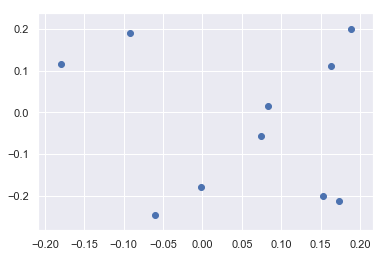

In [500]:
model = KMeans(n_clusters=10)
df_features = model.fit(df_log)
centers= df_features.cluster_centers_
plt.scatter(centers[:,0], centers[:,1])

In [501]:
kmeans_results = KMeans(n_clusters=3).fit(df_log)
for n in range (kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    centroid= kmeans_results.cluster_centers_[n]
    indices= centroid.argsort()
    for i in indices:
        print((list(df_log)[i]), end=" ")
        
    print(" ")

Cluster  0 :  online data analysis cid social practices different inquiry teacher design learners process new group education activities technology collaborative classroom work support cscl collaboration environment computer  
Cluster  1 :  cscl collaboration collaborative cid computer group online support learners activities social work technology classroom environment process new different design analysis teacher education inquiry data practices  
Cluster  2 :  environment education inquiry teacher practices design classroom work new different technology process support activities computer learners data analysis social group collaboration collaborative online cid cscl  


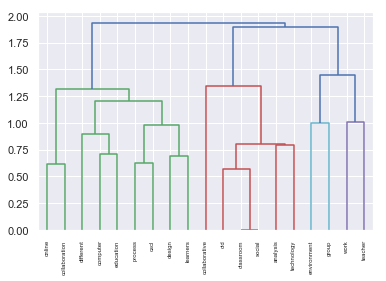

In [502]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


mergings = linkage(df_log, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels = df_log.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [503]:
from sklearn.metrics.pairwise import cosine_similarity

[-0.13155638  0.23957408 -0.0565311   0.34986025  0.02166602  0.15661706
  0.01154193 -0.17935374  0.02182127  0.08619739  0.08704881 -0.13480793
  0.0769034   0.04958256 -0.72923308  0.12539577 -0.17169911  0.07635537
  0.21311429 -0.10262355 -0.05175513 -0.21314943  0.08668814  0.07074198
 -0.0312248 ]


In [506]:
#df with yearsxyears with their relative frequencies 
cos_sim = pd.DataFrame(index = df_new.index, columns = df_new.index)

for i in range(df.shape[0] - 1): 
    c = df.shape[0] - i - 1
    v1 = np.array(df_new.iloc[i])
    for j in range(c):
        d = j + i + 1
        v2 = np.array(df_new.iloc[d])
        dot = np.dot(v1, v2)
        norma = np.linalg.norm(v1)
        normb = np.linalg.norm(v2)
        cos = dot / (norma * normb)
        cos_sim.iloc[i,d] = cos
    

In [507]:
cos_sim = cos_sim.fillna(value = 0)
cos_sim

,1995,1996,1997,1998,1999,2000,2002,2004,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015
1995,0,0.822842,0.752107,0.870445,0.851139,0.900955,0.808718,0.954186,0.804976,0.816220,0.227933,0.848544,0.967127,0.857894,0.902657,0.852721,0.945680,0.875677
1996,0,0.000000,0.700897,0.915806,0.780506,0.845295,0.734330,0.851484,0.633976,0.650835,0.184040,0.685876,0.776077,0.724088,0.736884,0.696647,0.802079,0.704628
1997,0,0.000000,0.000000,0.704219,0.905743,0.691035,0.950626,0.700293,0.797932,0.819999,0.176137,0.867492,0.709992,0.867459,0.711602,0.850607,0.629182,0.854822
1998,0,0.000000,0.000000,0.000000,0.836215,0.884161,0.758687,0.841920,0.724795,0.687253,0.197789,0.736600,0.799527,0.776673,0.793437,0.767762,0.829202,0.766343
1999,0,0.000000,0.000000,0.000000,0.000000,0.832237,0.954230,0.809110,0.912474,0.878685,0.280401,0.899284,0.813821,0.931575,0.844402,0.913358,0.767981,0.921170
2000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.779969,0.884440,0.799133,0.742228,0.207093,0.775477,0.899721,0.850680,0.850820,0.823418,0.873328,0.811066
2002,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.776537,0.913476,0.922910,0.195980,0.945912,0.780369,0.954840,0.781291,0.940371,0.720766,0.935585
2004,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.739862,0.754314,0.201410,0.762682,0.919174,0.793701,0.863371,0.772579,0.910606,0.794993
2005,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.939117,0.212837,0.935846,0.814892,0.962137,0.790548,0.957902,0.738692,0.952445
2007,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200173,0.959243,0.800891,0.961530,0.763592,0.958984,0.731942,0.946440


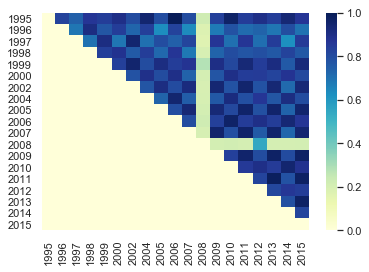

In [471]:
import seaborn as sns
sns.heatmap(cos_sim, cmap="YlGnBu")

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


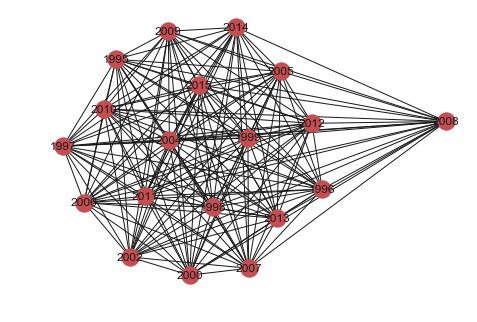

In [478]:
import networkx as nx
G=nx.Graph(cos_sim)
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()
